<a href="https://colab.research.google.com/github/BrandonOrtiz7/Metodos-numericos/blob/main/Chebyshev_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

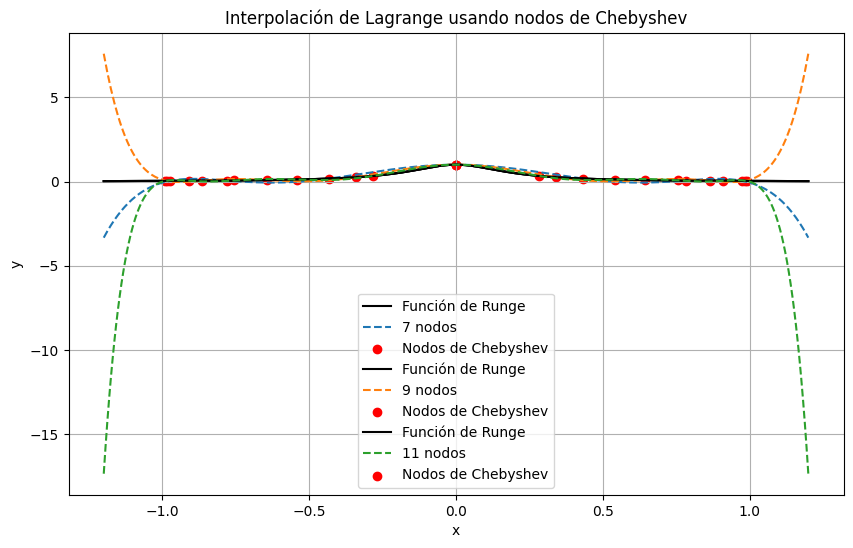

In [1]:
import sympy as sp            # Librería para álgebra simbólica
import numpy as np            # Librería para cálculos numéricos
import matplotlib.pyplot as plt  # Librería para graficar

# Definimos la función de Runge
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Calcula los nodos de Chebyshev en el intervalo [a, b]
def nodos_chebyshev(n, a, b):
    # Utiliza la fórmula: x_k = (a+b)/2 + (b-a)/2 * cos((2k+1)π / 2n)
    return [(a + b)/2 + (b - a)/2 * np.cos((2*k + 1) * np.pi / (2*n)) for k in range(n)]

# Definimos la función que construye el polinomio de Lagrange
def lagrange_interpolacion(puntos):
    x = sp.Symbol('x')         # Definimos el símbolo x para usar en el polinomio
    n = len(puntos)            # Número total de puntos
    P = 0                      # Inicializamos el polinomio resultante

    for i in range(n):         # Recorremos cada punto
        xi, yi = puntos[i]     # Extraemos las coordenadas del punto i
        Li = 1                 # Inicializamos el producto L_i(x)

        for j in range(n):     # Recorremos de nuevo los puntos para construir L_i
            if i != j:         # Evitamos dividir entre cero
                xj, _ = puntos[j]           # Obtenemos la coordenada x del punto j
                Li *= (x - xj) / (xi - xj)  # Construimos L_i(x)

        P += yi * Li           # Sumamos el término y_i * L_i(x) al polinomio

    return sp.simplify(P)      # Simplificamos el polinomio para hacerlo más legible

# Función para graficar el polinomio y la función de Runge
def graficar_comparacion(puntos, P, label):
    x = sp.Symbol('x')                         # Variable simbólica x
    f_interp = sp.lambdify(x, P, 'numpy')      # Convertimos el polinomio a función numérica
    f_runge = runge_function                   # Función original de Runge

    x_vals = np.linspace(-1.2, 1.2, 400)       # Valores de x donde evaluaremos para graficar
    y_interp = f_interp(x_vals)                # Evaluamos el polinomio interpolante
    y_runge = f_runge(x_vals)                  # Evaluamos la función de Runge

    plt.plot(x_vals, y_runge, label="Función de Runge", color='black')  # Curva original
    plt.plot(x_vals, y_interp, label=f"{label} nodos", linestyle='--')  # Polinomio interpolante
    plt.scatter(*zip(*puntos), color='red', label="Nodos de Chebyshev") # Dibujamos los nodos
    plt.title("Interpolación de Lagrange usando nodos de Chebyshev")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)


plt.figure(figsize=(10, 6))           # Creamos el panel de gráficas de buen tamaño

for n in [7, 9, 11]:                  # Probamos con 7, 9 y 11 nodos de Chebyshev
    nodos_x = nodos_chebyshev(n, -1, 1)              # Calculamos los nodos
    nodos_y = [runge_function(xi) for xi in nodos_x] # Evaluamos la función de Runge en los nodos
    puntos = list(zip(nodos_x, nodos_y))             # Formamos la lista de puntos (xi, yi)

    P = lagrange_interpolacion(puntos)               # Obtenemos el polinomio interpolante
    graficar_comparacion(puntos, P, label=str(n))    # Graficamos resultados para cada n

plt.show()  # Mostramos todo en un solo panel
